In [5]:
# import packages 
import os
from os import listdir
from os.path import isfile, join
import fnmatch
import pandas as pd
import functools
import itertools
from itertools import product
import natsort
from natsort import natsorted, ns

# math and statistics
import re
import math
import operator 
import numpy as np
import scipy as sp
import scipy.stats as stats
import statistics
import random
from sklearn.decomposition import PCA

# figures
import seaborn as sbn
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D  

In [6]:
from datetime import datetime
current_date = datetime.now()
formatted_date = current_date.strftime("%Y.%m.%d")

root = '/Users/grantongo/Desktop/nature methods/figures'

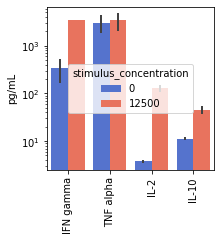

In [7]:
# figure 1b: secreted proteins

df = pd.read_csv(f'{root}/data pbmc/pbmc_pgml_imputed.csv')

df_pbmc = df[(df['donor']==1) & 
             (df['stimulus'].isin(['ConA','control'])) & 
             (df['cytokine']=='control') &
             (df['stimulus_concentration'].isin([0,12500]))][['stimulus_concentration','IFN gamma','TNF alpha','IL-2','IL-10']]

df_pbmc.to_csv(f'{root}/figure 1/data_figure.1.b_secreted_{formatted_date}.csv')
df_pbmc = df_pbmc.melt(id_vars='stimulus_concentration')

fig, ax = plt.subplots(1,1,figsize=(3,3), gridspec_kw={'wspace':0.2, 'hspace':0.4})
ax = sbn.barplot(data=df_pbmc,
                 x='variable',
                 y='value',
                 hue='stimulus_concentration',
                 errorbar='sd',
                 errwidth=2,
                 palette=['royalblue','tomato'])

ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('')
ax.set_ylabel('pg/mL')
ax.set_yscale('log')

fig.savefig(f'{root}/figure 1/png_figure.1.b_secreted_{formatted_date}.png',dpi=200, bbox_inches='tight')
fig.savefig(f'{root}/figure 1/svg_figure.1.b_secreted_{formatted_date}.svg')

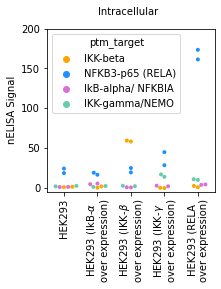

In [8]:
# figure 1c: intracellular 

df = pd.read_csv(f'{root}/data ptm intracellular/data_ptm_intracellular.csv')

# select CLAMPs
ptm_pairs = ['CL-7.T.15.2','CL-7.P.8.1',
             'CL-3.T.3.2','CL-3.P.2.1',
             'CL-5.T.7.2','CL-5.P.2.1',
             'CL-8.T.4.2','CL-8.P.11.1',
             'CL-2.T.1.2','CL-2.P.6.1',
             'CL-9.T.4.2','CL-9.P.4.1',
             'CL-11.T.4.2','CL-11.P.2.1']
ptm_targets = set(df['ptm_target'])
ptm_samples = set(df['sample'])

df_int = df[(df['clamp'].isin(ptm_pairs)) & 
            (df['phos_total']=='total') &
            (df['ptm_target'].isin(['NFKB3-p65 (RELA)','IKK-beta','IkB-alpha/ NFKBIA','IKK-gamma/NEMO'])) &
            (df['sample'].isin(['TAK1','IKBa','IKKb','IKKg','RELA']))].dropna()
order = ['HEK293','HEK293 (IkB-$\\alpha$\nover expression)',
         'HEK293 (IKK-$\\beta$\nover expression)',
         'HEK293 (IKK-$\\gamma$\nover expression)',
         'HEK293 (RELA\nover expression)']

df_int['value'] = df_int['value'] + 1 # shift positive

fig, ax = plt.subplots(1,1,figsize=(3,3), gridspec_kw={'wspace':0.2, 'hspace':0.4})
fig.suptitle('Intracellular',fontsize=10)

ax = sbn.swarmplot(data=df_int,
                 x='cell_sample',
                 y='value',
                 hue='ptm_target',
                 order=order,
                 alpha=1,
                 size=4,
                 palette=['orange','dodgerblue','orchid','mediumaquamarine'])
#ax.legend_.remove()
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('')
ax.set_ylabel('nELISA Signal')
ax.set_ylim(-5,200)
ax.set_yscale('linear')

df_int.to_csv(f'{root}/figure 1/data_figure.1.c_intra_{formatted_date}.csv')
fig.savefig(f'{root}/figure 1/png_figure.1.c_intra_{formatted_date}.png',bbox_inches='tight',dpi=200)
fig.savefig(f'{root}/figure 1/svg_figure.1.c_intra_{formatted_date}.svg',bbox_inches='tight')

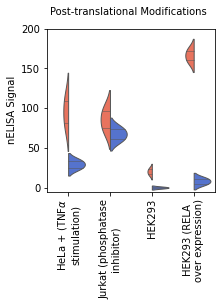

In [9]:
# figure 1d: post-translational modifications 

df = pd.read_csv(f'{root}/data ptm intracellular/data_ptm_intracellular.csv')

# select CLAMPs
ptm_pairs = ['CL-7.T.15.2','CL-7.P.8.1',
             'CL-3.T.3.2','CL-3.P.2.1',
             'CL-5.T.7.2','CL-5.P.2.1',
             'CL-8.T.4.2','CL-8.P.11.1',
             'CL-2.T.1.2','CL-2.P.6.1',
             'CL-9.T.4.2','CL-9.P.4.1',
             'CL-11.T.4.2','CL-11.P.2.1']
ptm_targets = set(df['ptm_target'])
ptm_samples = set(df['sample'])

df_ptm = df[(df['clamp'].isin(ptm_pairs)) & 
            (df['ptm_target']=='NFKB3-p65 (RELA)')].dropna()

order = ['HeLa + (TNF$\\alpha$\nstimulation)',
         'Jurkat (phosphatase\ninhibitor)',
         'HEK293',
         'HEK293 (RELA\nover expression)']

fig, ax = plt.subplots(1,1,figsize=(3,3), gridspec_kw={'wspace':0.2, 'hspace':0.4})
fig.suptitle('Post-translational Modifications',fontsize=10)

ax = sbn.violinplot(data=df_ptm, 
                 x='cell_sample',
                 y='value',
                 hue='legend',
                 split=True,
                 gap=0.1,
                 inner="stick",
                 order=order,
                 alpha=0.5,
                 linewidth=1,
                 density_norm="count",
                 palette=['tomato','royalblue'],
                 ax=ax)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('')
ax.set_ylabel('nELISA Signal')
ax.set_ylim(-5,200)
ax.legend_.remove()

df_ptm.to_csv(f'{root}/figure 1/data_figure.1.d_ptm_{formatted_date}.csv')
fig.savefig(f'{root}/figure 1/png_figure.1.d_ptm_{formatted_date}.png',bbox_inches='tight',dpi=200)
fig.savefig(f'{root}/figure 1/svg_figure.1.d_ptm_{formatted_date}.svg',bbox_inches='tight')

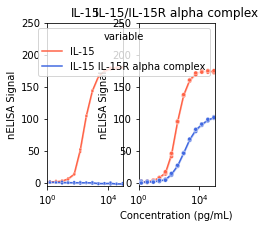

In [10]:
# figure 1e: protein-protein interactions

df_agpools = pd.read_csv(f'{root}/data calibration standard/df_agpools_uniprot.csv')
df_cali = pd.read_csv(f'{root}/data calibration standard/CALI_SNR.csv')
sensors = pd.read_csv(f'{root}/data calibration standard/sensors.csv')['0'].to_list()
metadata_columns = [col for col in df_cali.columns if col not in sensors]

# check antigen pools 
# df_agpools[df_agpools['Label'].isin(['IL-12 p35','IL-12 p40','IL-12 p70','IL-35','IL-23'])]

df_cali['sample_ag'] = df_cali['sample'].map({'AgPool3':'IL-15', 'AgPool4':'IL-15/IL-15R alpha complex'})
df_cali = df_cali.dropna(subset='sample_ag')

id_vars = ['plate_name', 'plate_barcode', 'position', 'sample', 'pool','concentration', 'concentration_unit','sample_ag']
df_cali = df_cali[id_vars + ['IL-15','IL-15 IL-15R alpha complex']]
df_cali = df_cali.melt(id_vars=id_vars, value_vars=['IL-15','IL-15 IL-15R alpha complex'])
df_cali['concentration'] = df_cali['concentration'].astype('float')*1000 #convert from ng/mL to pg/mL

fig, ax = plt.subplots(1,2,figsize=(3,3), gridspec_kw={'wspace':0.2, 'hspace':0.4})
ax = ax.ravel()

ax[0] = sbn.lineplot(data=df_cali[df_cali['sample_ag']=='IL-15'], 
                     x='concentration',
                     y='value',
                     hue='variable',
                     #marker='o',
                     palette=['tomato','royalblue'],
                     ax=ax[0]
                    )
ax[0] = sbn.scatterplot(data=df_cali[df_cali['sample_ag']=='IL-15'], 
                     x='concentration',
                     y='value',
                     hue='variable',
                     marker='o',
                     s=6,
                     palette=['tomato','royalblue'],
                     ax=ax[0],
                     zorder=100
                    )
ax[0].set_title('IL-15')
ax[0].set_xscale('log')
ax[0].set_xlabel('')
ax[0].set_ylabel('nELISA Signal')
ax[0].legend_.remove()

ax[1] = sbn.lineplot(data=df_cali[df_cali['sample_ag']=='IL-15/IL-15R alpha complex'], 
                     x='concentration',
                     y='value',
                     hue='variable',
                     err_style='band',
                     palette=['tomato','royalblue'],
                     ax=ax[1]
                    )
ax[1] = sbn.scatterplot(data=df_cali[df_cali['sample_ag']=='IL-15/IL-15R alpha complex'], 
                     x='concentration',
                     y='value',
                     hue='variable',
                     marker='o',
                     alpha=1,
                     s=15,
                     palette=['tomato','royalblue'],
                     ax=ax[1],
                     legend=None,
                     zorder=100
                    )
ax[1].set_title('IL-15/IL-15R alpha complex')
ax[1].set_xscale('log')
ax[1].set_xlabel('Concentration (pg/mL)')
ax[1].set_ylabel('nELISA Signal')
ax[1].set_ylim(-5,250)
ax[0].set_ylim(-5,250)
ax[1].set_xlim(1,100000)
ax[0].set_xlim(1,100000)

df_cali.to_csv(f'{root}/figure 1/data_figure.1.e_ppi_{formatted_date}.csv')
fig.savefig(f'{root}/figure 1/png_figure.1.e_ppi_{formatted_date}.png',bbox_inches='tight',dpi=200)
fig.savefig(f'{root}/figure 1/svg_figure.1.e_ppi_{formatted_date}.svg',bbox_inches='tight')